# Multi-class Classification with Logistic Regression.

# 1. Problem Statement and Dataset

Necessary Imports

In [ ]:
import os
import requests
import gzip
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**1.2. Data Extraction/Collections**

The following section deals with the downloading of the MNIST - Handwritten Digit Dataset, extracting the pixel values and store it in a .csv file.

**1.2.1 Download MNIST images:**

In [ ]:
def download_mnist(url, save_path):
  """
  This function checks if the specified folder ( save_path ) exists . If not , it creates the
  folder . Then , it loops through a list of MNIST dataset files and downloads them from
  the provided URL if they don ’t already exist in the local folder .
  Arguments :
  inputs : url {web address of dataset }.
  save_path : where do you want to save the downloaded image file .
  """
  if not os.path.exists(save_path):
    os.makedirs(save_path)

  files = ['train-images-idx3-ubyte.gz' , 'train-labels-idx1-ubyte.gz' , 't10k-images-idx3-ubyte.gz' , 't10k-labels-idx1-ubyte.gz']

  for file in files:
    file_path = os.path.join(save_path, file)
    if not os.path.exists(file_path):
      print(f"Downloading {files}...")
      r = requests.get(f"{url}/{file}", stream=True)
      with open(file_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=128):
          f.write(chunk)

**1.2.2 Reading images and labels from the MNIST Dataset.**

The below function reads the images and labels from the MNIST Dataset and reshaps the pixel values of the image into a 28x28 matrix.

In [ ]:
def read_mnist_images_labels(images_file, labels_file):
  """
  This function takes the paths to the gzip - compressed image and label files and reads
  them . It skips the header information in each file and then reads the pixel values
  of images and corresponding labels . The images are reshaped to a 3D array (( -1 , 28 ,
  28)) where each image is a 28 x28 matrix .
  Arguments :
  """
  with gzip.open(images_file, 'rb') as f_images, gzip.open(labels_file, 'rb') as f_labels:
    # Read header information
    f_images.read(16)
    f_labels.read(8)

    # Read images and labels
    images = np.frombuffer(f_images.read(), dtype=np.uint8).reshape(-1, 28, 28)
    labels = np.frombuffer(f_labels.read(), dtype=np.uint8)

  return images, labels

**1.2.3 Saving Pixel Values to a CSV file:**

The following function changes the pixels of the images into a csv format.

In [ ]:
def save_to_csv(images, labels, csv_file):
  """
  This function takes the loaded images , labels , and the desired CSV file name .
  Then , it iterates through each image , flattens it to a 1D array , and writes a row to the
  CSV file , including the label and pixel values .
  """

  with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['label'] + [f'pixel_{i}' for i in range(28 * 28)])

    for i in range(len(images)):
      row = list(np.concatenate([labels[i].reshape(1), images[i].flatten()]))
      writer.writerow(row)

1.2.4 Main Part of the Script:

Functions calling

In [ ]:
# Set the URL for MNIST dataset
mnist_url = "http://yann.lecun.com/exdb/mnist"

# Set the local folder to save the dataset
save_folder = "./mnist_dataset"

# Download the MNIST dataset
download_mnist(mnist_url, save_folder)

# Read images and labels
train_images, train_labels = read_mnist_images_labels(os.path.join(save_folder, 'train-images-idx3-ubyte.gz'),os.path.join(save_folder, 'train-labels-idx1-ubyte.gz'))

# Save pixel values to CSV file
save_to_csv(train_images, train_labels, 'mnist_dataset.csv')

#2. Multinomial Regression for Digit Classification

Path to the csv file

In [ ]:
path = './mnist_dataset.csv'
data = pd.read_csv(path)

In [ ]:
rows, columns = data.shape

print(f"Number of rows =  {rows}")
print(f"Number of columns = {columns}")

Number of rows =  60000
Number of columns = 785


The .csv file has a total of 60000 rows and 785 columns. The columns are made up of 784 columns for each pixel and one for labeling. Overall, the csv file's dimension is 60000 x 785

   label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
0      5        0        0        0        0        0        0        0   
1      0        0        0        0        0        0        0        0   
2      4        0        0        0        0        0        0        0   
3      1        0        0        0        0        0        0        0   
4      9        0        0        0        0        0        0        0   

   pixel_7  pixel_8  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
0          0          0          0          0 

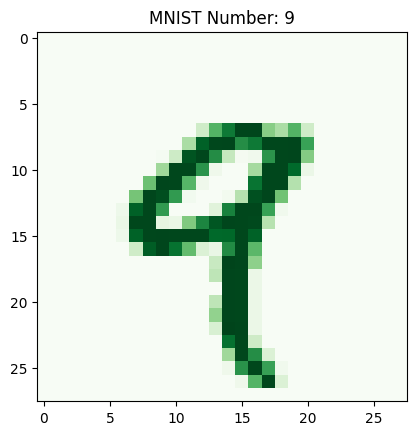

In [ ]:
#Loading the dataset and reading the file has been performed above
print(data.head())

index = 4 #Selecting the label in the 4th index

#retriving all the values starting from the second column of the row with index 4
image = data.iloc[index, 1:].values

image_matrix = np.reshape(image, (28, 28))

plt.imshow(image_matrix, cmap='Greens')
plt.title(f'MNIST Number: {data.iloc[index, 0]}')
plt.show()

In [ ]:
data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel_783
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
data.dropna(inplace=True) #Removing NaN values

In [ ]:
X = data.iloc[:, 1:]  #Selecting columns after excluding the label column
Y = data.iloc[:, 0]  #Selecting all the rows

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #Standardization

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
#Model Training
model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train,Y_train)

#Making Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#Model Evaluation
train_accuracy = accuracy_score(Y_train, train_predictions) * 100
test_accuracy = accuracy_score(Y_test, test_predictions) * 100
precision = precision_score(Y_test, test_predictions, average='weighted')*100
recall = recall_score(Y_test, test_predictions, average='weighted')*100
print(f"Train Accuracy = {train_accuracy:.2f}%")
print(f"Test Accuracy = {test_accuracy:.2f}%")
print(f"Precision = {precision:.2f}%")
print(f"Recall = {recall:.2f}%")

Train Accuracy = 94.62%
Test Accuracy = 91.52%
Precision = 91.50%
Recall = 91.52%


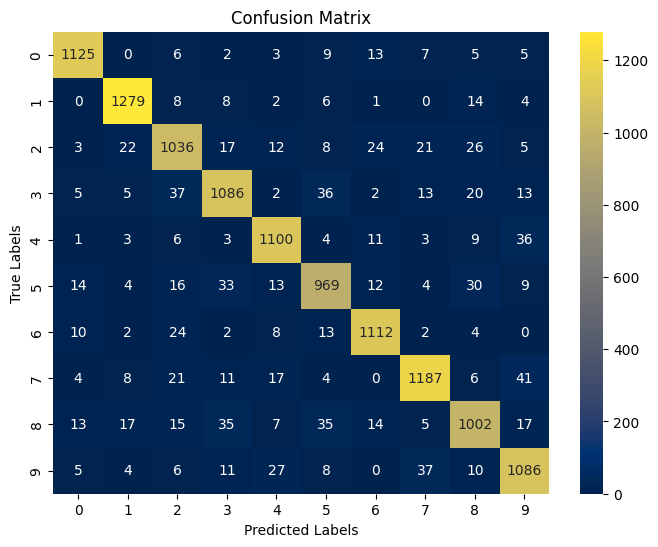

In [ ]:
#Heatmap of the confusion matrix
conf_matrix = confusion_matrix(Y_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The following code snippet calculates the classification reports for the training and testing sets. It shows the overall precision, recall, f1-score, and support for each class.

In [ ]:
class_report_train = classification_report(Y_train, train_predictions)
class_report_test = classification_report(Y_test, test_predictions)
print("Classification Report for Training Data:")
print(class_report_train)
print("\nClassification Report for Test Data:")
print(class_report_test)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4748
           1       0.97      0.98      0.98      5420
           2       0.94      0.93      0.94      4784
           3       0.93      0.92      0.92      4912
           4       0.95      0.95      0.95      4666
           5       0.92      0.92      0.92      4317
           6       0.96      0.97      0.97      4741
           7       0.96      0.96      0.96      4966
           8       0.92      0.92      0.92      4691
           9       0.92      0.93      0.93      4755

    accuracy                           0.95     48000
   macro avg       0.95      0.95      0.95     48000
weighted avg       0.95      0.95      0.95     48000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1175
           1       0.95      0.97      0.96      1322

Thus, both the logistic regression models have a really good classification performance on both the training and testing data.

#3. Linear Separability and Logistic Regression

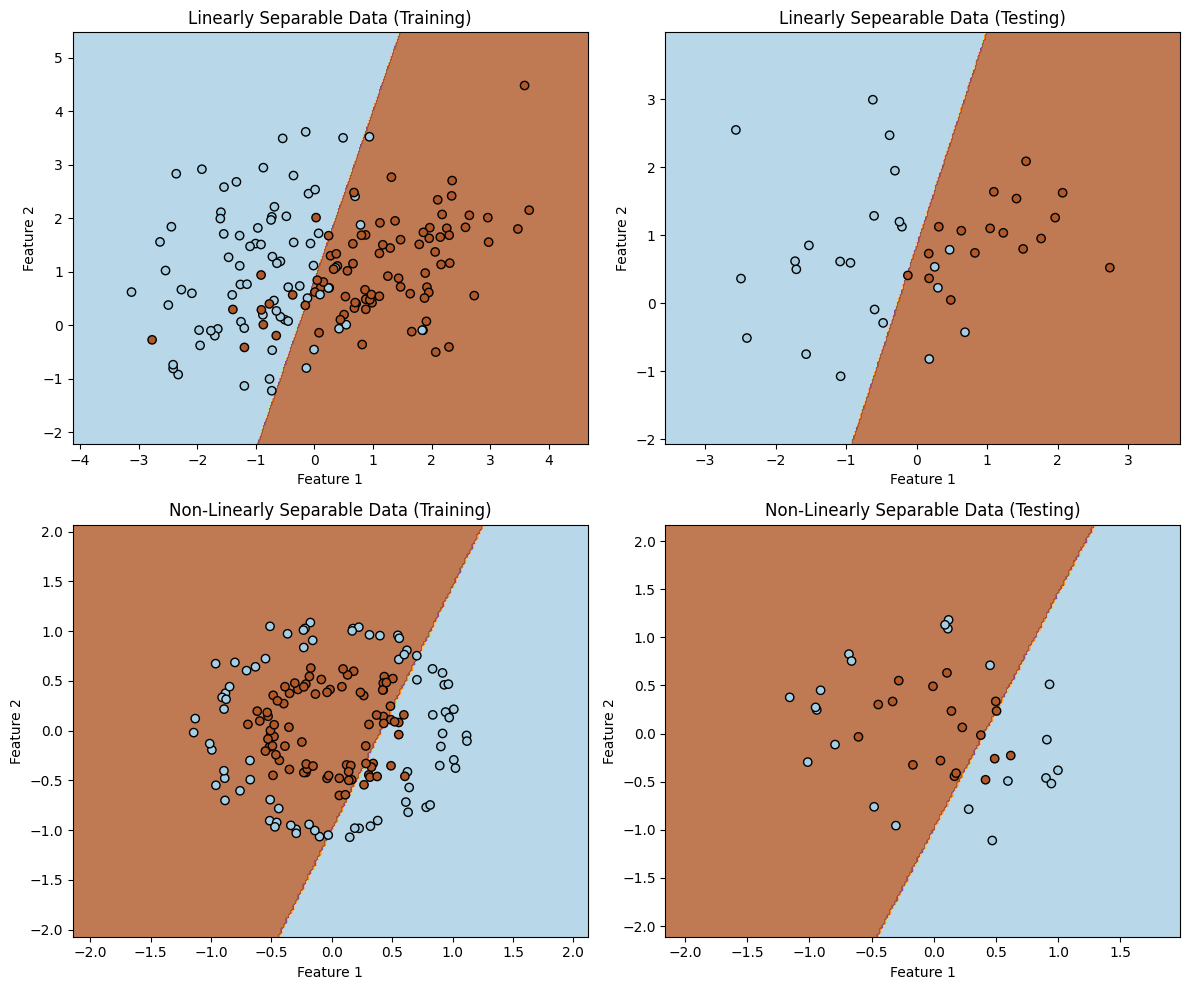

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
# Generate linearly separable dataset
X_linear_separable, y_linear_separable = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
# Split the data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear_separable, y_linear_separable, test_size=0.2, random_state=42)
# Train logistic regression model on linearly separable data
logistic_model_linear_separable = LogisticRegression()
logistic_model_linear_separable.fit(X_train_linear, y_train_linear)
# Generate non - linearly separable dataset ( circles )
X_non_linear_separable, y_non_linear_separable = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)
# Split the data into training and testing sets
X_train_non_linear, X_test_non_linear, y_train_non_linear, y_test_non_linear = train_test_split(X_non_linear_separable, y_non_linear_separable, test_size=0.2, random_state=42)
# Train logistic regression model on non - linearly separable data
logistic_model_non_linear_separable = LogisticRegression()
logistic_model_non_linear_separable.fit(X_train_non_linear, y_train_non_linear)
# Plot decision boundaries for linearly and non - linearly separable data
def plot_decision_boundary(ax, model, X, y, title):
  h= .02 # step size in the mesh
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z=Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
  ax.scatter(X[:,0],X[:,1],c=y, edgecolors='k',cmap=plt.cm.Paired)
  ax.set_title(title)
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
# Create subplots
fig, axes=plt.subplots(2,2,figsize=(12,10))
# Plot decision boundary for linearly separable data ( Training )
plot_decision_boundary(axes[0,0], logistic_model_linear_separable,X_train_linear, y_train_linear, 'Linearly Separable Data (Training)')
# Plot decision boundary for linearly separable data ( Testing )
plot_decision_boundary(axes[0,1], logistic_model_linear_separable, X_test_linear, y_test_linear,'Linearly Sepearable Data (Testing)')
# Plot decision boundary for non - linearly separable data ( Training )
plot_decision_boundary(axes[1,0], logistic_model_non_linear_separable,X_train_non_linear,y_train_non_linear,'Non-Linearly Separable Data (Training)')
# Plot decision boundary for non - linearly separable data ( Testing )
plot_decision_boundary(axes[1,1], logistic_model_non_linear_separable,X_test_non_linear,y_test_non_linear,'Non-Linearly Separable Data (Testing)')
plt.tight_layout()
# Save the plots as PNG files
plt.savefig('decision_boundaries.png')
plt.show()

**Output Interpretation**

The output consists of four plots showcasing the decision boundaries for logistic regression models trained on a linearly separable dataset and a non-linearly separable dataset.<br><br>
The top left and top right plots represents the decision boundary for the model applied on the linear training and linear testing data. For the training set the scattered points represent the training data points. While the testing set showcases the potential of model to process unseen data. From both the plots we can also see that a straight line line is enough to separate the points on the plot based on their class (blue and orange points)<br><br>
The bottom left and bottom right plots represents the decision boundary for the model applied on the non-linear training and non-linear testing data. Unlike the linear training and testing plots the classes are in a circular pattern making it obvious that a straight line is not to separate and classify the classes (blue and orange points). Thus, limiting the accuracy.

**Difficulties Faced**

Logistic Regression is a linear model and assumes a linear relationship between the features and the probabilities. Thus, it is easy to interpret decision boundaries for linear data. However, Logistic Regression struggles when interpreting the decision boundaries for non-linear data as the regression will try to find a suitable linear decision boundary but the data is scattered in a non-linear manner (such as a circle in this case).